In [1]:
import h5py
import pandas as pd
from simpledbf import Dbf5
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
tdm900_2050SE =pd.read_csv(r"\\modelqueen\ModelQueen-D\Josh_Projects\REMM2_For_Python3_Internal_Use_Andy\TDM\WF TDM v9.0 - 2023-01-30\1_Inputs\2_SEData\REMM\SE_2050.csv")
tdm900_2050SE.columns = [name + '_TDM900' for name in list(tdm900_2050SE)]

In [3]:
tdm832_2050SE =pd.read_csv(r"E:\REMM2_For_Python3_Internal_Use\TDM\_TDMv8.3.2_REMM\1_Inputs\2_SEData\REMM\taz900_SE_2050.csv")
tdm832_2050SE.columns = [name + '_TDM832' for name in list(tdm832_2050SE)]

In [4]:
result = pd.merge(tdm900_2050SE,tdm832_2050SE,left_on=';TAZID_TDM900', right_on = ';TAZID_TDM832', how = 'inner')

No handles with labels found to put in legend.


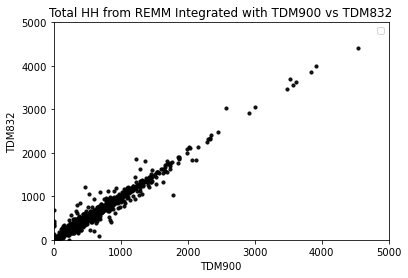

In [5]:
import matplotlib.pyplot as plt

plt.xlim(0, 5000)
plt.ylim(0, 5000)
plt.scatter(result['TOTHH_TDM900'], result['TOTHH_TDM832'], s=10, c="k", alpha=0.9)
plt.title('Total HH from REMM Integrated with TDM900 vs TDM832')
plt.xlabel('TDM900')
plt.ylabel('TDM832')
plt.legend(fontsize=9)
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error 
realVals = result.TOTHH_TDM900
predictedVals = result.TOTHH_TDM832
RMSE = mean_squared_error(realVals, predictedVals, squared = False)
print('RMSE TOTHH: ', RMSE)
print('Normalized RMSE TOTHH: ', RMSE/(result.TOTHH_TDM832.max() - result.TOTHH_TDM900.min()))

RMSE TOTHH:  53.827218303977496
Normalized RMSE TOTHH:  0.007352440691705709


In [7]:
from sklearn.metrics import mean_squared_error 
realVals = result.ALLEMP_TDM900
predictedVals = result.ALLEMP_TDM832
RMSE = mean_squared_error(realVals, predictedVals, squared = False)
print('RMSE ALLEMP: ', RMSE)
print('Normalized RMSE ALLEMP: ', RMSE/(result.TOTHH_TDM832.max() - result.TOTHH_TDM900.min()))

RMSE ALLEMP:  404.58622290574806
Normalized RMSE ALLEMP:  0.05526379222862288


In [8]:
from sklearn.metrics import mean_squared_error 
realVals = result.RETEMP_TDM900
predictedVals = result.RETEMP_TDM832
RMSE = mean_squared_error(realVals, predictedVals, squared = False)
print('RMSE RETEMP: ', RMSE)
print('Normalized RMSE RETEMP: ', RMSE/(result.TOTHH_TDM832.max() - result.TOTHH_TDM900.min()))

RMSE RETEMP:  156.80643673408574
Normalized RMSE RETEMP:  0.021418718308166336


In [9]:
from sklearn.metrics import mean_squared_error 
realVals = result.INDEMP_TDM900
predictedVals = result.INDEMP_TDM832
RMSE = mean_squared_error(realVals, predictedVals, squared = False)
print('RMSE INDEMP: ', RMSE)
print('Normalized RMSE INDEMP: ', RMSE/(result.TOTHH_TDM832.max() - result.TOTHH_TDM900.min()))

RMSE INDEMP:  71.89975082068578
Normalized RMSE INDEMP:  0.009821028660112797


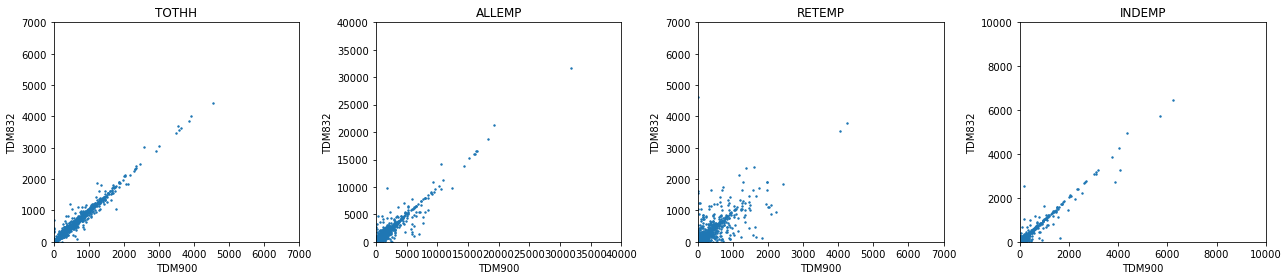

In [10]:
fig, axs = plt.subplots(1, 4, figsize=(18, 4))
axs[1].scatter(result.ALLEMP_TDM900, result.ALLEMP_TDM832,s = 2)
axs[1].set_title('ALLEMP')
axs[1].set_xlabel('TDM900')
axs[1].set_ylabel('TDM832')
axs[1].set_xlim(0, 40000)
axs[1].set_ylim(0, 40000)
axs[0].scatter(result.TOTHH_TDM900, result.TOTHH_TDM832,s = 2)
axs[0].set_title('TOTHH')
axs[0].set_xlabel('TDM900')
axs[0].set_ylabel('TDM832')
axs[0].set_xlim(0, 7000)
axs[0].set_ylim(0, 7000)
axs[2].scatter(result.RETEMP_TDM900, result.RETEMP_TDM832,s = 2)
axs[2].set_title('RETEMP')
axs[2].set_xlabel('TDM900')
axs[2].set_ylabel('TDM832')
axs[2].set_xlim(0, 7000)
axs[2].set_ylim(0, 7000)
axs[3].scatter(result.INDEMP_TDM900, result.INDEMP_TDM832,s = 2)
axs[3].set_title('INDEMP')
axs[3].set_xlabel('TDM900')
axs[3].set_ylabel('TDM832')
axs[3].set_xlim(0, 10000)
axs[3].set_ylim(0, 10000)
fig.tight_layout()
plt.show()

In [11]:
result.to_csv('taz900_2050SE_fromRemmIntegrationBetwen900_queen_832.csv')